In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')



In [33]:
df = pd.read_csv('./data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
events = df['event']
print(events.size == events.count())

True


In [4]:
events_vc = df['event'].value_counts()
events_vc

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [5]:
products_top5 = df['sku'].value_counts().head(5)
products_top5

2830.0     4282
2831.0     3770
2829.0     3709
8443.0     3506
12758.0    2939
Name: sku, dtype: int64

Text(0,0.5,'Frecuencia ')

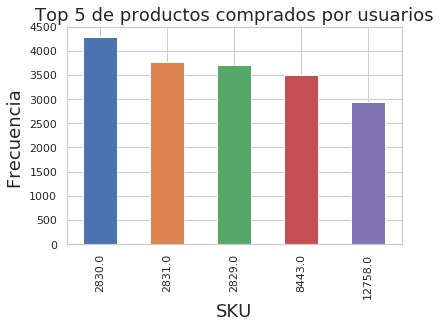

In [6]:
g = products_top5.plot.bar()
g.set_title("Top 5 de productos comprados por usuarios", fontsize=18)
g.set_xlabel("SKU", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [7]:
users = df['person']
users_top10 = users.value_counts().head(10)
users_top10

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

Text(0,0.5,'Frecuencia ')

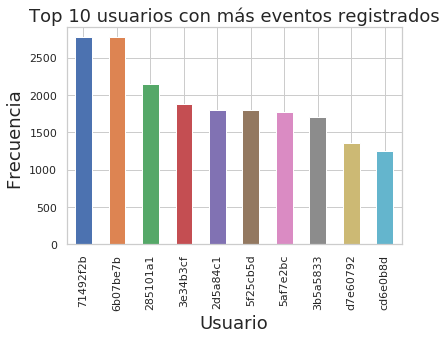

In [8]:
g = users_top10.plot.bar()
g.set_title("Top 10 usuarios con más eventos registrados", fontsize=18)
g.set_xlabel("Usuario", fontsize=18)
g.set_ylabel("Frecuencia ", fontsize=18)

In [9]:
otro  = df[['person','new_vs_returning']]
otro

,person,new_vs_returning
0,0004b0a2,NaN
1,0004b0a2,New
2,0004b0a2,NaN
3,0004b0a2,NaN
4,0006a21a,NaN
5,0006a21a,New
6,0006a21a,NaN
7,0006a21a,NaN
8,000a54b2,NaN
9,000a54b2,New


Veo que cantidad de nuevos usuarios realizaron un evento por primera vez y cuantos volvieron a contabilizar un evento

In [10]:
df['new_vs_returning'].value_counts()

Returning    60480
New          26898
Name: new_vs_returning, dtype: int64

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

In [12]:
df['month'].value_counts()

5    474949
6    281882
4    130008
3     77293
2     27886
1     19270
Name: month, dtype: int64

In [13]:

events_short = df.filter(items=['person','event' ,'new_vs_returning','month'])
events_short['Cantidad_de_Eventos'] = 1
events_short['Conversiones'] = events_short['event'] == 'conversion'

events_short

,person,event,new_vs_returning,month,Cantidad_de_Eventos,Conversiones
0,0004b0a2,ad campaign hit,NaN,5,1,False
1,0004b0a2,visited site,New,5,1,False
2,0004b0a2,viewed product,NaN,5,1,False
3,0004b0a2,checkout,NaN,5,1,False
4,0006a21a,viewed product,NaN,5,1,False
5,0006a21a,visited site,New,5,1,False
6,0006a21a,ad campaign hit,NaN,5,1,False
7,0006a21a,checkout,NaN,5,1,False
8,000a54b2,generic listing,NaN,4,1,False
9,000a54b2,visited site,New,4,1,False


Separo la cantidad de usuarios new y returning por mes

In [14]:
grouped = events_short.groupby(['new_vs_returning','month']).agg({'Cantidad_de_Eventos':('sum')})

In [15]:
grouped

Cantidad_de_Eventos
new_vs_returning month                     
New              1                      517
                 2                      499
                 3                     1125
                 4                     1627
                 5                    12604
                 6                    10526
Returning        1                     1618
                 2                     2291
                 3                     6122
                 4                    11023
                 5                    27533
                 6                    11893

# Agrupo por mes cuantas conversiones hubo

In [16]:
grouped = events_short.groupby(['month']).agg({'Conversiones':'sum'})
grouped

,Conversiones
month,
1,63.0
2,74.0
3,265.0
4,316.0
5,351.0
6,103.0


# Quiero ver cuantos eventos necesitó la gente para hacer una conversion

In [17]:
grupo = events_short.groupby(['person']).agg({'Cantidad_de_Eventos':'sum', 'Conversiones':'sum'}) 
#grupo.loc[grupo['Conversion'] == False, :]
#grupo = grupo.groupby(['Cantidad de Eventos']).agg({'Conversiones':'sum'}) 
#grupo['Conversion'].sum()
grupo['Cant de Personas'] = 1
grupo = grupo.groupby(['Cantidad_de_Eventos']).agg({'Conversiones':'sum', 'Cant de Personas':'sum'}) 

grupo = grupo.reset_index()
grupo

,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,0.0,471
1,2,55.0,428
2,3,21.0,512
3,4,7.0,3248
4,5,11.0,1514
5,6,6.0,1282
6,7,8.0,1126
7,8,15.0,1178
8,9,2.0,909
9,10,2.0,943


In [18]:
sin_conversiones= grupo[grupo.Conversiones == 0]

sin_conversiones.sort_values(by='Cant de Personas', ascending=False).head()

,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,0.0,471
37,38,0.0,157
56,57,0.0,74
61,62,0.0,66
64,65,0.0,44


In [19]:
grupo_max = grupo[grupo.Conversiones > 0]

grupo_max = grupo_max.sort_values(by='Conversiones', ascending=False).head(50)
#La mayor cantidad de conversiones se registra con 2 eventos
grupo_max = grupo_max.reset_index()
grupo_max

,index,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,1,2,55.0,428
1,2,3,21.0,512
2,119,120,15.0,16
3,135,136,15.0,21
4,7,8,15.0,1178
5,458,576,11.0,1
6,306,310,11.0,4
7,16,17,11.0,501
8,241,243,11.0,9
9,501,762,11.0,2


Text(0,0.5,'Conversiones')

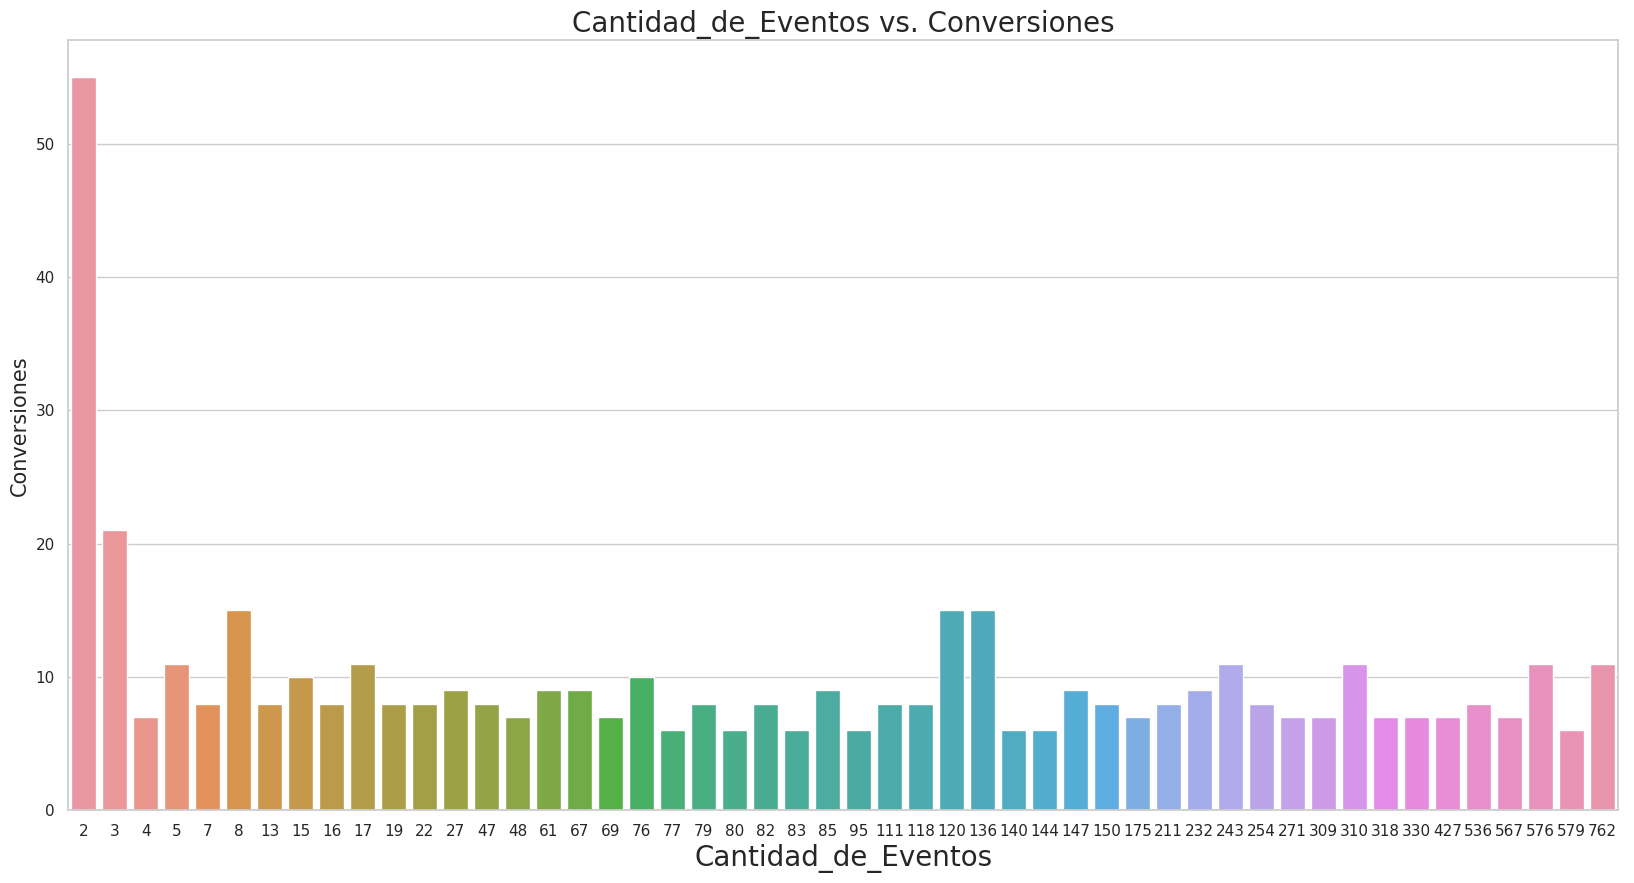

In [124]:
plt.rcParams["axes.labelsize"] = 30
university_per_age_graph = sns.barplot(x=grupo_max['Cantidad_de_Eventos'], y=grupo_max['Conversiones'], orient='v')
university_per_age_graph.set_title("Cantidad_de_Eventos vs. Conversiones", fontsize=20)
university_per_age_graph.set_xlabel("Cantidad_de_Eventos", fontsize=20)
university_per_age_graph.set_ylabel("Conversiones", fontsize=15)

In [21]:
grupo_eventos = grupo_max.sort_values(by='Cant de Personas', ascending=False)
grupo_eventos = grupo_eventos.reset_index()
grupo_eventos = grupo_eventos.head(20)
grupo_eventos
#La mayoria de las personas tienen estos eventos

,level_0,index,Cantidad_de_Eventos,Conversiones,Cant de Personas
0,34,3,4,7.0,3248
1,10,4,5,11.0,1514
2,4,7,8,15.0,1178
3,19,6,7,8.0,1126
4,23,12,13,8.0,698
5,11,14,15,10.0,519
6,1,2,3,21.0,512
7,7,16,17,11.0,501
8,25,15,16,8.0,477
9,0,1,2,55.0,428


Text(0,0.5,'Cant de Personas')

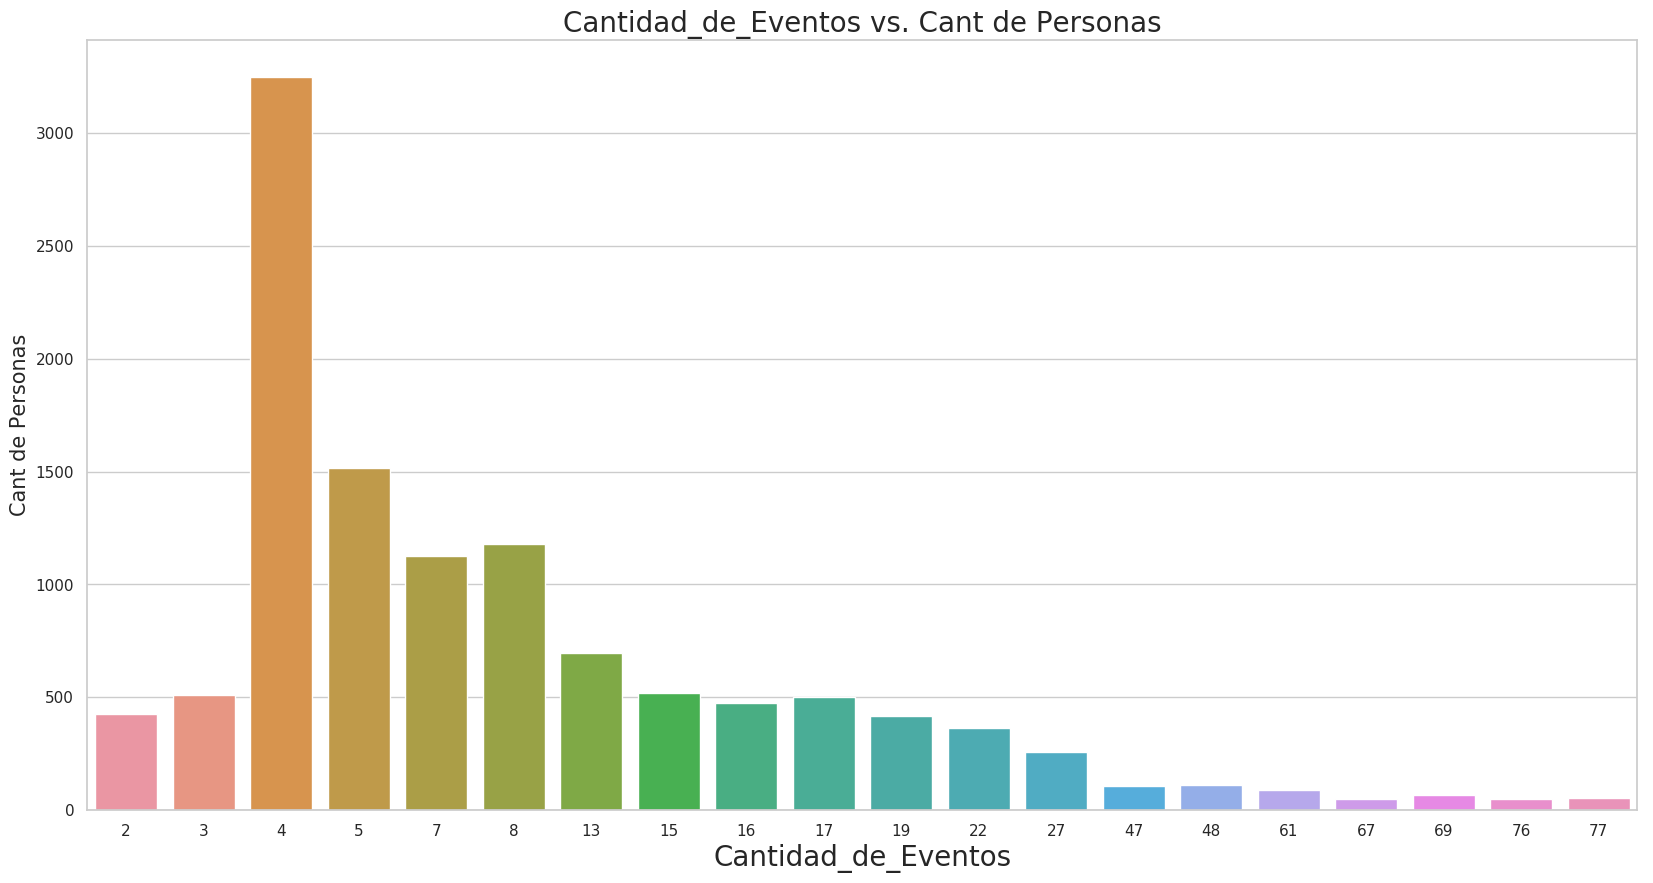

In [125]:
plt.rcParams["axes.labelsize"] = 30
university_per_age_graph = sns.barplot(x=grupo_eventos['Cantidad_de_Eventos'], y=grupo_eventos['Cant de Personas'], orient='v')
university_per_age_graph.set_title("Cantidad_de_Eventos vs. Cant de Personas", fontsize=20)
university_per_age_graph.set_xlabel("Cantidad_de_Eventos", fontsize=20)
university_per_age_graph.set_ylabel("Cant de Personas", fontsize=15)

In [23]:
events_short = df.filter(items=['person','event', 'month'])
events_short = events_short[(events_short.event == 'conversion') | (events_short.event == 'checkout')]
events_short['Conversiones'] = events_short['event'] == 'conversion'
events_short['CheckOut'] = events_short['event'] == 'checkout'

grouped = events_short.groupby(['month']).agg({'Conversiones':'sum', 'CheckOut':'sum'})
grouped = grouped.reset_index()
grouped

,month,Conversiones,CheckOut
0,1,63.0,331.0
1,2,74.0,441.0
2,3,265.0,1386.0
3,4,316.0,1965.0
4,5,351.0,15645.0
5,6,103.0,13967.0


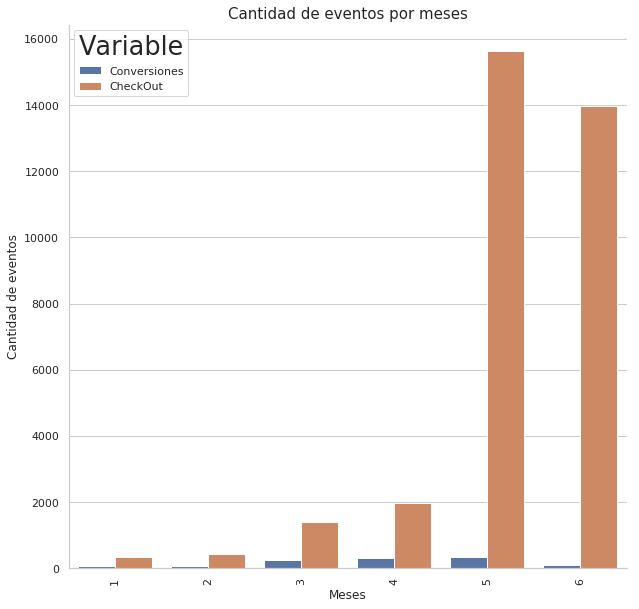

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    grouped.set_index('month')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='month', y='Value', hue='Variable', data=tidy, ax=ax1, orient='v')
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Cantidad de eventos por meses", fontsize=15)
g.set_xlabel("Meses", fontsize=12)
g.set_ylabel("Cantidad de eventos", fontsize=12)

sns.despine(fig)

In [25]:
los_eventos = df.filter(items=['person','event'])
los_eventos['Cantidad_de_Eventos'] = 1
#eventos = los_eventos.groupby(['person']).agg({'Cantidad de Eventos':'sum'}) 
#evento
los_eventos = los_eventos.groupby(['person']).agg({'Cantidad_de_Eventos':'sum'}) 
los_eventos[los_eventos['Cantidad_de_Eventos'] == 2]

,Cantidad_de_Eventos
person,
0275546e,2
02e033b0,2
02fd5563,2
057446d4,2
07353dfc,2
074d5b64,2
09592dc9,2
0b0c064c,2
0b886ea6,2


In [26]:
los_eventos = df.filter(items=['person','event'])
los_eventos[los_eventos['person'] == 'ff8d3872']

,person,event
1008943,ff8d3872,conversion
1008944,ff8d3872,checkout


In [27]:
df[df['person'] == '1146f7ee']

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,month
59176,2018-05-18 14:32:12,conversion,1146f7ee,NaN,2940.0,Sony Xperia Z2,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
59177,2018-05-18 14:40:12,checkout,1146f7ee,NaN,2940.0,Sony Xperia Z2,Muito Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


# Analizo las marcas mas visitadas

In [38]:
marca_filter = df.filter(items=['model'])
marca_filter = marca_filter[events_short.model.notnull()]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)
marca_filter

,Cantidad
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [87]:
apple_filter = marca_filter.filter(like='iP', axis=0)
apple_filter = apple_filter.sort_values(by='Cantidad', ascending=False)
apple_filter

,Cantidad
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
iPhone 7 Plus,18792
iPhone SE,16531
iPhone 6S Plus,12855
iPhone 6 Plus,12766
iPhone 5c,12689


In [88]:
apple_filter.Cantidad.sum()
#Cantidad total de eventos de apple

258499

In [69]:
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
samsung_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
Samsung Galaxy S8,16959
Samsung Galaxy J5,13044
Samsung Galaxy S6 Flat,11608
Samsung Galaxy S6 Edge,11175
Samsung Galaxy S8 Plus,10502
Samsung Galaxy J7 Prime,9312
Samsung Galaxy J7,7195


In [89]:
samsung_filter.Cantidad.sum()

218127

In [68]:
motorola_filter = marca_filter.filter(like='Moto', axis=0)
motorola_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Motorola Moto G4 Plus,8080
Motorola Moto X Play 4G Dual,6828
Motorola Moto G3 4G,5156
Motorola Moto X2,5143
Motorola Moto G5,4947
Motorola Moto G5 Plus,4272
Motorola Moto Z Play,3255
Motorola Moto G2 3G Dual,2870
Motorola Moto X Style,2863


In [90]:
motorola_filter.Cantidad.sum()

63518

In [67]:
asus_filter = marca_filter.filter(like='Asus', axis=0)
asus_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Asus Zenfone 5,729
Asus Zenfone 6,590
Asus Zenfone 2 Deluxe,203
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 2,142
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone Selfie,49
Asus Zenfone 3 Zoom,44
Asus Zenfone 2 Laser,12


In [91]:
asus_filter.Cantidad.sum()

2091

In [66]:
lg_filter = marca_filter.filter(like='LG', axis=0)
lg_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
LG G4 H818P,1306
LG G5 SE,1183
LG G3 D855,1122
LG L Prime D337,941
LG K10 Novo,927
LG K10 TV,900
LG G4 H815P,568
LG Prime Plus H522,468
LG G3 Beat D724,323


In [92]:
lg_filter.Cantidad.sum()

9724

In [64]:
black_filter = marca_filter.filter(like='berry', axis=0)
black_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Blackberry Blackberry Z30,1


In [93]:
black_filter.Cantidad.sum()

1

In [122]:
marcas = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(), lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas

,Marca,Cantidad
0,Apple,258499
1,Samsumg,218127
2,Motorola,63518
3,LG,9724
4,Asus,2091
5,Blackberry,1


Text(0,0.5,'Cantidad de Eventos')

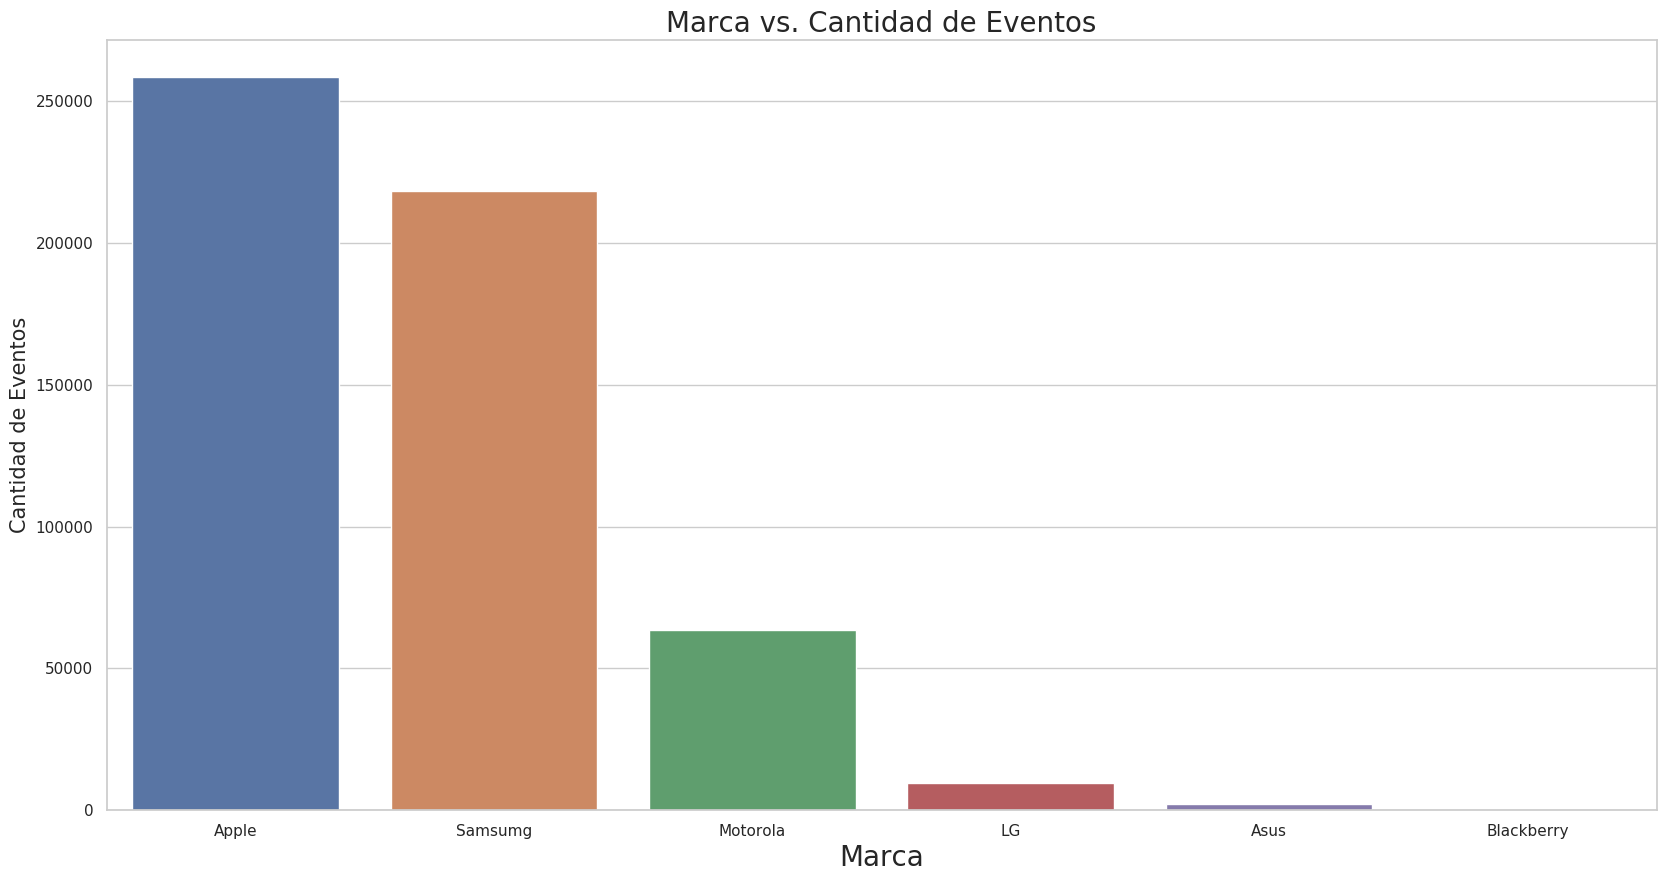

In [123]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas["Marca"], y=marcas['Cantidad'], orient='v')
marcas_plot.set_title("Marca vs. Cantidad de Eventos", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Eventos", fontsize=15)

# ANALIZO LOS MODELOS CON MAS VISITAS

In [45]:
events_short = df.filter(items=['model','storage','event','sku'])
model_events = events_short[events_short.model.notnull()]
model_events["Cantidad_Eventos"] = 1
model_events = model_events.groupby(['model']).agg({'Cantidad_Eventos':'sum'})
model_events

,Cantidad_Eventos
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [46]:
model_events = model_events.sort_values(by='Cantidad_Eventos', ascending=False).head(10)
model_events

,Cantidad_Eventos
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
iPhone 7 Plus,18792
Samsung Galaxy S8,16959
iPhone SE,16531


In [47]:
model_events = model_events.reset_index()

Text(0,0.5,'Cantidad de Eventos')

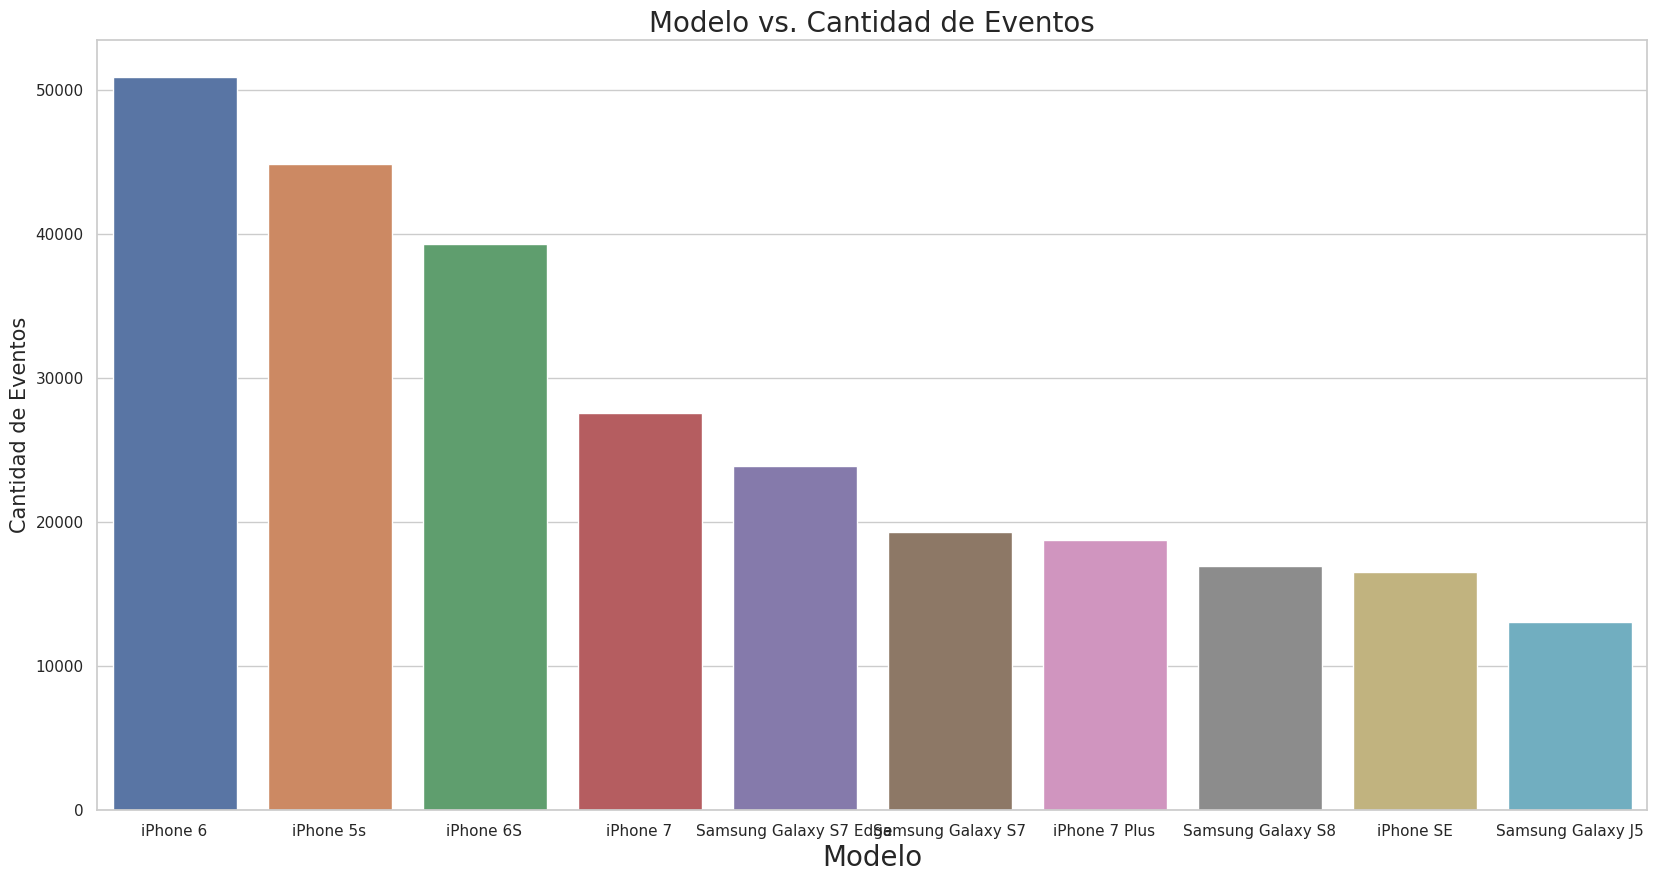

In [48]:
plt.rcParams["axes.labelsize"] = 30
model_events_plot = sns.barplot(x=model_events["model"], y=model_events['Cantidad_Eventos'], orient='v')
model_events_plot.set_title("Modelo vs. Cantidad de Eventos", fontsize=20)
model_events_plot.set_xlabel("Modelo", fontsize=20)
model_events_plot.set_ylabel("Cantidad de Eventos", fontsize=15)

In [49]:
model_conversion = events_short[events_short.event == "conversion"]
model_conversion["Cantidad_Conv"] = 1
model_conversion = model_conversion.groupby(['model']).agg({'Cantidad_Conv':'sum'})
model_conversion

,Cantidad_Conv
model,
Asus Zenfone 3 Max 16 GB,1
Asus Zenfone 5,1
LG G3 D855,6
LG G4 H815P,2
LG G4 H818P,1
LG K10,3
LG K10 Novo,2
LG K10 TV,3
LG L Prime D337,3


In [50]:
model_conversion = model_conversion.sort_values(by='Cantidad_Conv', ascending=False)
model_conversion = model_conversion.head(10)
model_conversion

,Cantidad_Conv
model,
Samsung Galaxy J5,88
iPhone 5s,84
iPhone 6,71
Samsung Galaxy S6 Flat,39
iPhone 6S,37
iPhone 5c,33
Motorola Moto G4 Plus,30
Motorola Moto G3 4G,30
Samsung Galaxy J7,28


In [51]:
model_conversion = model_conversion.reset_index()

Text(0,0.5,'Cantidad de Conversiones')

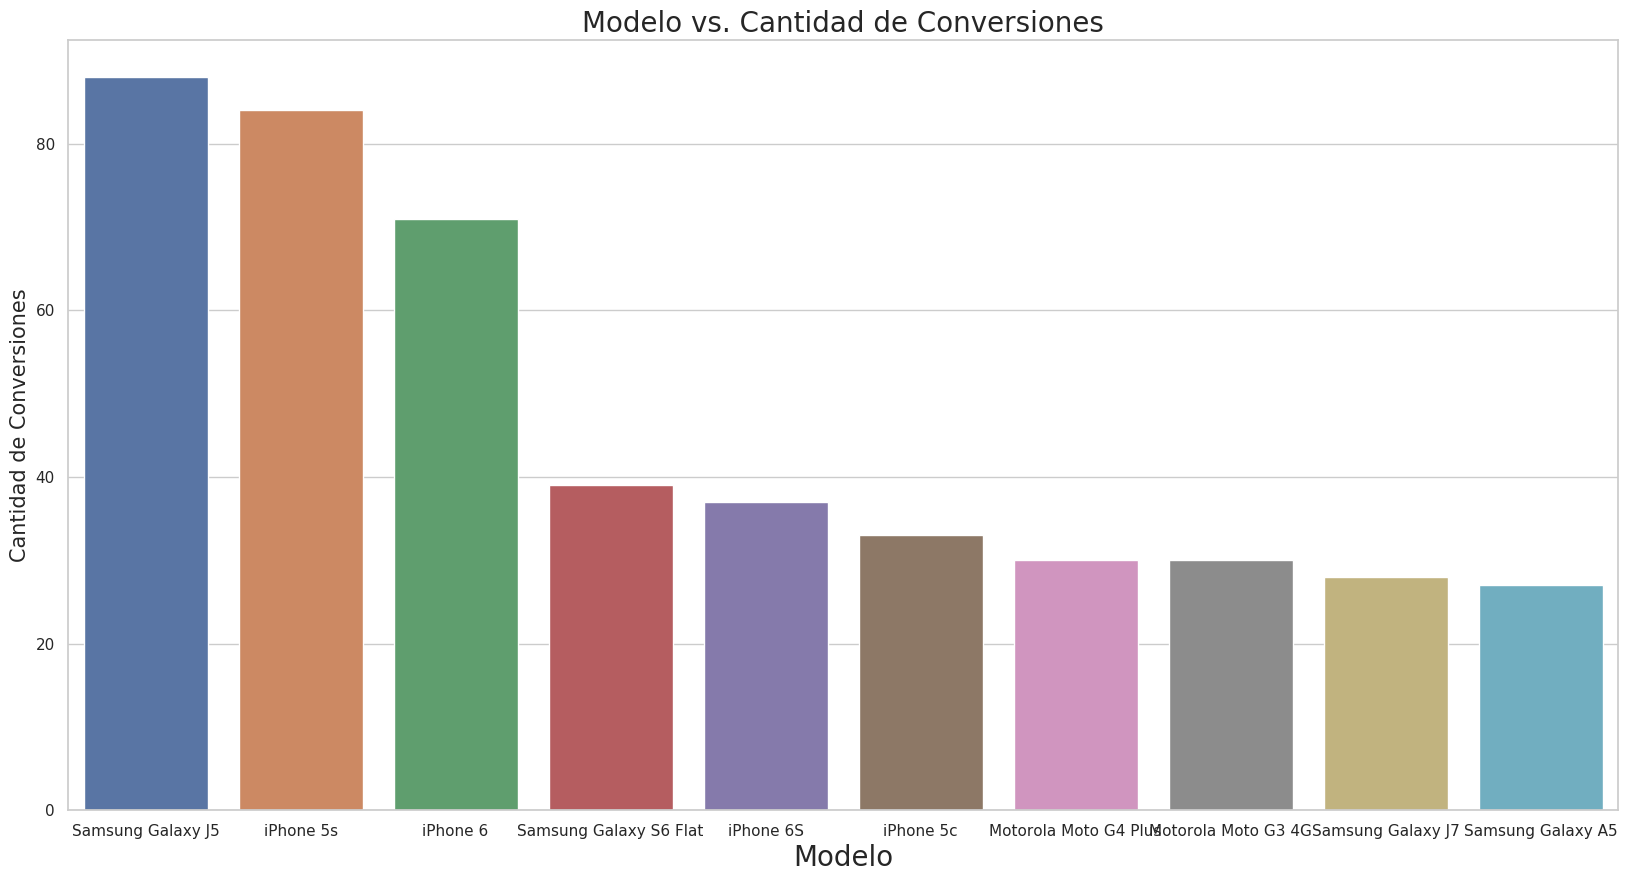

In [52]:
plt.rcParams["axes.labelsize"] = 30
model_conversion_plot = sns.barplot(x=model_conversion["model"], y=model_conversion['Cantidad_Conv'], orient='v')
model_conversion_plot.set_title("Modelo vs. Cantidad de Conversiones", fontsize=20)
model_conversion_plot.set_xlabel("Modelo", fontsize=20)
model_conversion_plot.set_ylabel("Cantidad de Conversiones", fontsize=15)

In [53]:
model_checkout = events_short[events_short.event == "checkout"]
model_checkout["Cantidad_Check"] = 1
model_checkout = model_checkout.groupby(['model']).agg({'Cantidad_Check':'sum'})
model_checkout

,Cantidad_Check
model,
Asus Zenfone 2,4
Asus Zenfone 2 Deluxe,2
Asus Zenfone 3 Max 32 GB,8
Asus Zenfone 3 Max 16 GB,29
Asus Zenfone 3 Zoom,2
Asus Zenfone 5,8
Asus Zenfone 6,7
Asus Zenfone Go,3
LG X Screen,9


In [54]:
model_checkout = model_checkout.sort_values(by='Cantidad_Check', ascending=False).head(10)
model_checkout

,Cantidad_Check
model,
iPhone 6,3295
iPhone 5s,2744
iPhone 6S,2308
Samsung Galaxy J5,1918
Samsung Galaxy S7,1234
iPhone 7,1205
Samsung Galaxy S8,1074
iPhone 7 Plus,924
Samsung Galaxy J7 Prime,866


In [55]:
model_checkout = model_checkout.reset_index()
model_checkout

,model,Cantidad_Check
0,iPhone 6,3295
1,iPhone 5s,2744
2,iPhone 6S,2308
3,Samsung Galaxy J5,1918
4,Samsung Galaxy S7,1234
5,iPhone 7,1205
6,Samsung Galaxy S8,1074
7,iPhone 7 Plus,924
8,Samsung Galaxy J7 Prime,866
9,Samsung Galaxy S6 Flat,844


Text(0,0.5,'Cantidad de Checkouts')

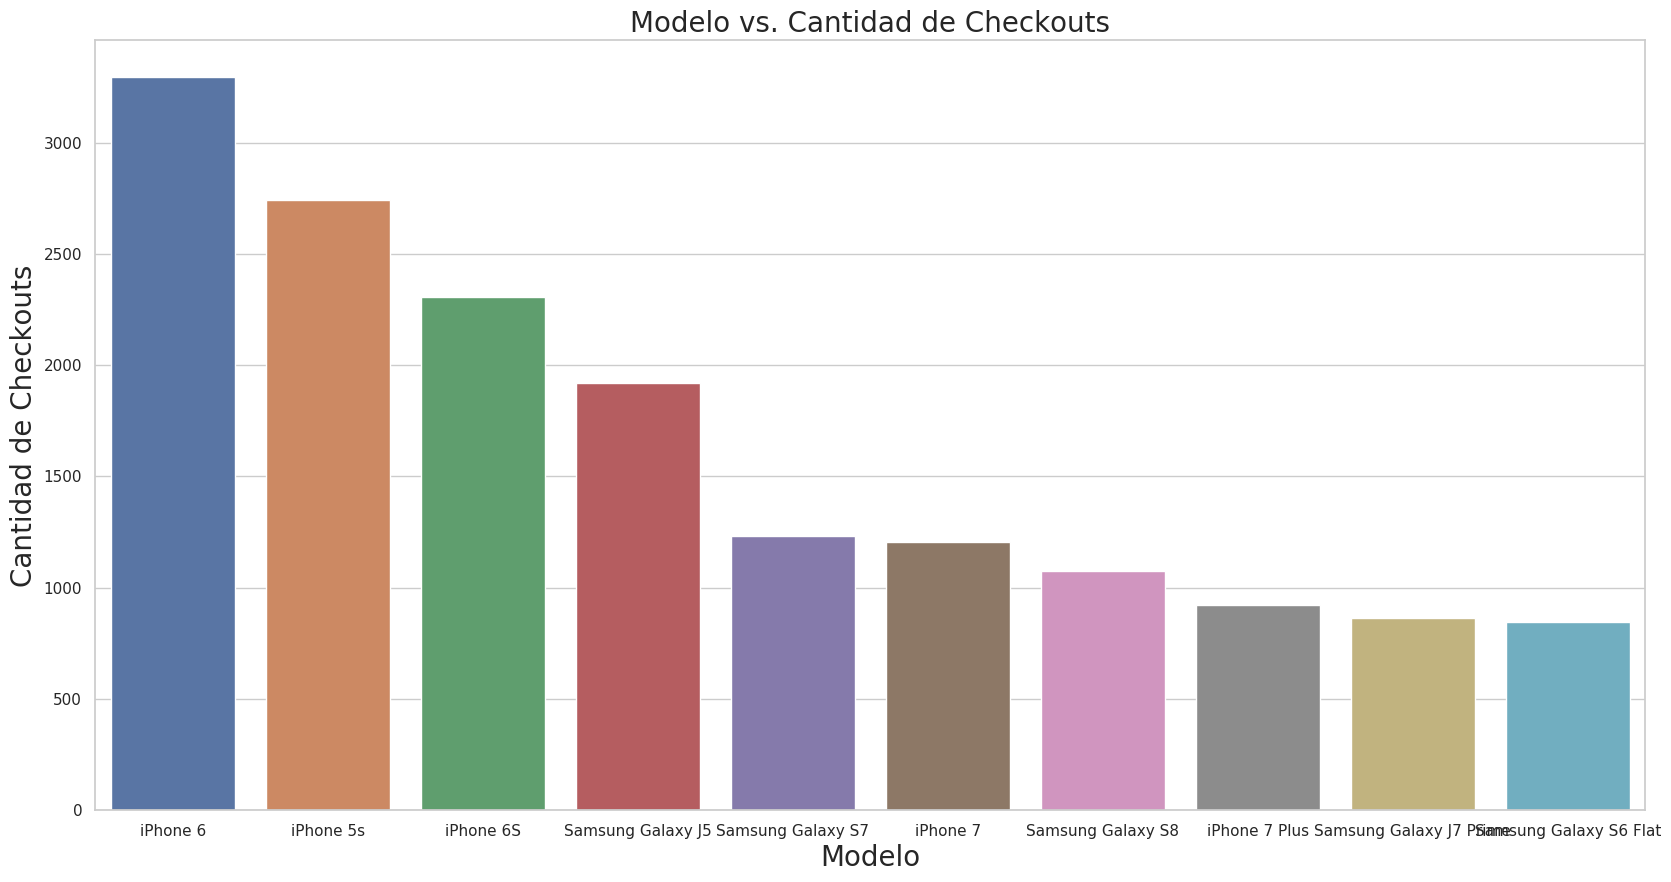

In [56]:
plt.rcParams["axes.labelsize"] = 30
model_checkout_plot = sns.barplot(x=model_checkout["model"], y=model_checkout['Cantidad_Check'], orient='v')
model_checkout_plot.set_title("Modelo vs. Cantidad de Checkouts", fontsize=20)
model_checkout_plot.set_xlabel("Modelo", fontsize=20)
model_checkout_plot.set_ylabel("Cantidad de Checkouts", fontsize=20)